# Disaster Tweet Classification

Machine Learning Club @SJSU -
Authors: Robert Yav, Richard Ky

The dataset used in this project is a dataset taken from kaggle: https://www.kaggle.com/code/cyrillescolano/nlp-disaster-tweet-classification The purpose of this project is to construct a ML model that will as accurately as possible classify tweets into disaster and nondisaster tweets.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing data (will be different as we work in different environments)
# In this case, this is Robert's Branch
test= pd.read_csv("data/test.csv")
train= pd.read_csv("data/train.csv")


We will begin with exploratory data analysis on the training dataset in order to identify any patterns or issues early on before the modeling stage.

In [3]:
train.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
test.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
print(sum(train["location"].isna())/train["location"].size)
print(sum(test["location"].isna())/test["location"].size)

0.33272034677525286
0.3386454183266932


Initially we can see that the location column contains many empty values. (33.27% null in train, 33.86% in test) Imputing this many null values may have a disasterous affect on the data, so we can choose to omit location.

In [7]:
train.drop(columns=["location"],inplace=True)

In [8]:
print(sum(train["keyword"].isna())/train["keyword"].size)
print(sum(test["keyword"].isna())/test["keyword"].size)

0.008012610009194798
0.00796812749003984


The only other column containing null values is the column "keyword". However, there is less than a percent (~0.8% null in both train and test) of empty values in this column. 

In [9]:
train.loc[train["keyword"].isna()]

id keyword                                               text  target
0         1     NaN  Our Deeds are the Reason of this #earthquake M...       1
1         4     NaN             Forest fire near La Ronge Sask. Canada       1
2         5     NaN  All residents asked to 'shelter in place' are ...       1
3         6     NaN  13,000 people receive #wildfires evacuation or...       1
4         7     NaN  Just got sent this photo from Ruby #Alaska as ...       1
...     ...     ...                                                ...     ...
7608  10869     NaN  Two giant cranes holding a bridge collapse int...       1
7609  10870     NaN  @aria_ahrary @TheTawniest The out of control w...       1
7610  10871     NaN  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  10872     NaN  Police investigating after an e-bike collided ...       1
7612  10873     NaN  The Latest: More Homes Razed by Northern Calif...       1

[61 rows x 4 columns]

We can either choose to omit these entries, generate the model with these entries empty, or fill in the null values manually with our own keywords selected from the text.

In [10]:
train.head(40)

id keyword                                               text  target
0    1     NaN  Our Deeds are the Reason of this #earthquake M...       1
1    4     NaN             Forest fire near La Ronge Sask. Canada       1
2    5     NaN  All residents asked to 'shelter in place' are ...       1
3    6     NaN  13,000 people receive #wildfires evacuation or...       1
4    7     NaN  Just got sent this photo from Ruby #Alaska as ...       1
5    8     NaN  #RockyFire Update => California Hwy. 20 closed...       1
6   10     NaN  #flood #disaster Heavy rain causes flash flood...       1
7   13     NaN  I'm on top of the hill and I can see a fire in...       1
8   14     NaN  There's an emergency evacuation happening now ...       1
9   15     NaN  I'm afraid that the tornado is coming to our a...       1
10  16     NaN        Three people died from the heat wave so far       1
11  17     NaN  Haha South Tampa is getting flooded hah- WAIT ...       1
12  18     NaN  #raining #flooding #Florida #TampaBay #Tampa 1...       1
13  19     NaN            #Flood in Bago Myanmar #We arrived Bago       1
14  20     NaN  Damage to school bus on 80 in multi car crash ...       1
15  23     NaN                                     What's up man?       0
16  24     NaN                                      I love fruits       0
17  25     NaN                                   Summer is lovely       0
18  26     NaN                                  My car is so fast       0
19  28     NaN                       What a goooooooaaaaaal!!!!!!       0
20  31     NaN                             this is ridiculous....       0
21  32     NaN                                  London is cool ;)       0
22  33     NaN                                        Love skiing       0
23  34     NaN                              What a wonderful day!       0
24  36     NaN                                           LOOOOOOL       0
25  37     NaN                     No way...I can't eat that shit       0
26  38     NaN                              Was in NYC last week!       0
27  39     NaN                                 Love my girlfriend       0
28  40     NaN                                          Cooool :)       0
29  41     NaN                                 Do you like pasta?       0
30  44     NaN                                           The end!       0
31  48  ablaze  @bbcmtd Wholesale Markets ablaze http://t.co/l...       1
32  49  ablaze  We always try to bring the heavy. #metal #RT h...       0
33  50  ablaze  #AFRICANBAZE: Breaking news:Nigeria flag set a...       1
34  52  ablaze                 Crying out for more! Set me ablaze       0
35  53  ablaze  On plus side LOOK AT THE SKY LAST NIGHT IT WAS...       0
36  54  ablaze  @PhDSquares #mufc they've built so much hype a...       0
37  55  ablaze  INEC Office in Abia Set Ablaze - http://t.co/3...       1
38  56  ablaze  Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...       1
39  57  ablaze                             Ablaze for you Lord :D       0

In [11]:
train["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [12]:
#Note to team: What should we do? Many of the na's can be preperly put into keywords but some are just online phrases like "LoOOL!!"

In [13]:
print(test["keyword"].nunique())
print(train["keyword"].nunique()) #221 Unique keywords

221
221


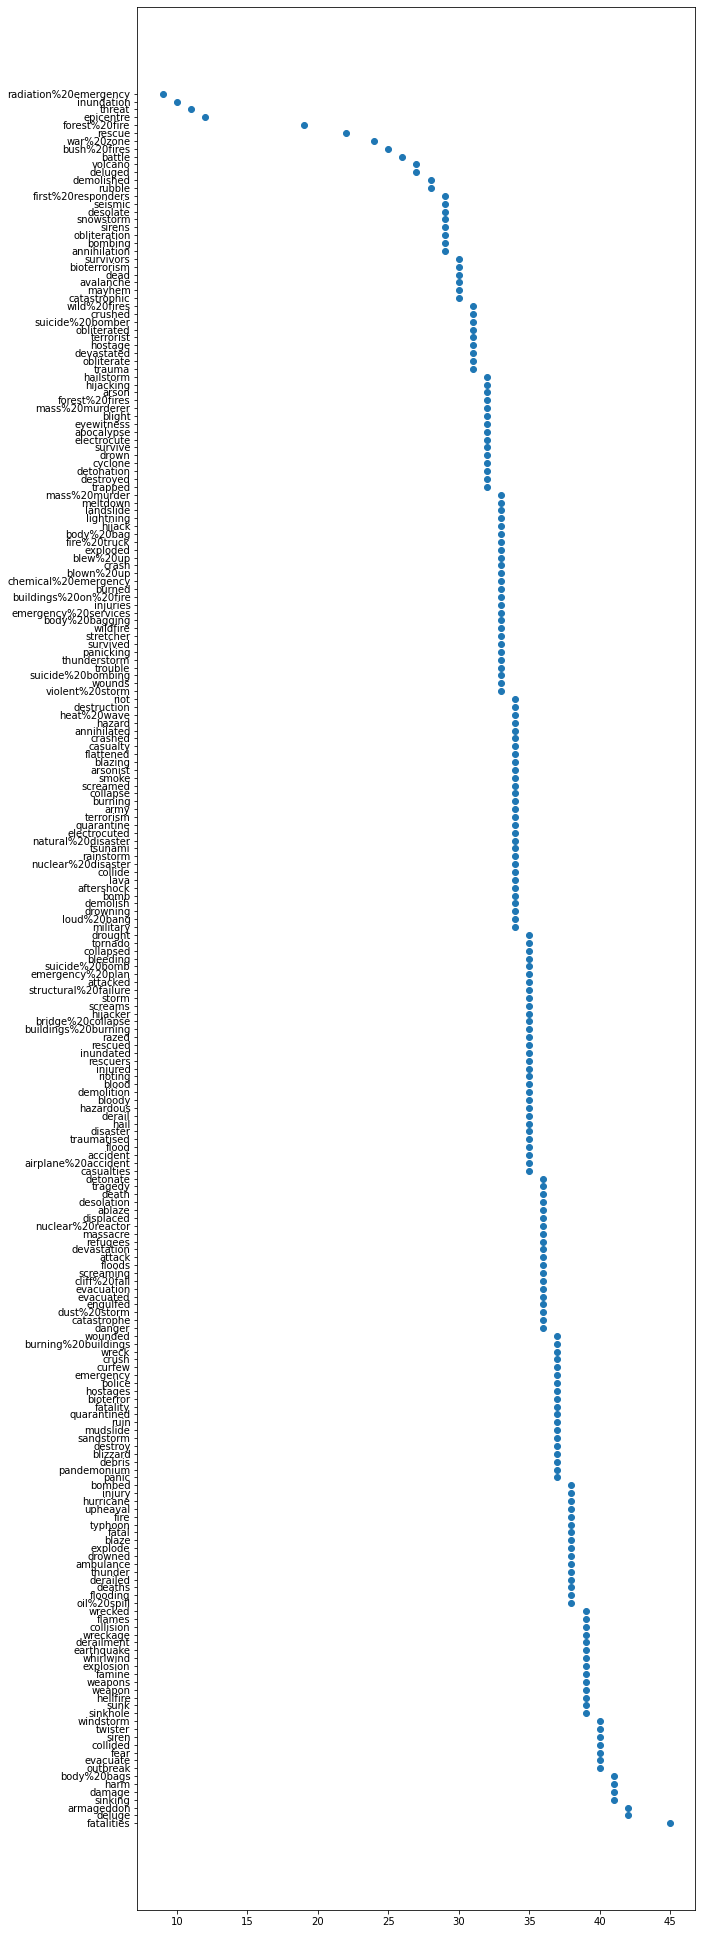

In [14]:
#Gotta find a better way to show the unique values. (main issue is that there are too many. maybe use subplots?)
unique_values = train["keyword"].value_counts()
fig,ax = plt.subplots(1,1,figsize=(10,35))
plt.scatter(unique_values.values,unique_values.index)
plt.show()

In [15]:
train.isna().sum()

id          0
keyword    61
text        0
target      0
dtype: int64

In [25]:
# We must lowercase all target text, tokenize and lemmaize
python -m spacy download en_core_web_sm
import spacy
train["text"] = train["text"].str.lower()



SyntaxError: invalid syntax (Temp/ipykernel_15004/2826692126.py, line 2)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
##Splitting the data (Change the test size back to 0.2, we changed it higher to reduce load time)
X=train.drop(columns=["target"])
y=train["target"]
X.shape,y.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.8)

In [18]:
# Attempting to fill in na values by filling them with preexisting keywords.
mask1 = X_train.loc[X_train["keyword"].isna()] 

# Can ignore these, just for debugging
#print(mask1['keyword'].isna().sum())  
#print(len(mask1[mask1['keyword'] == 'wildfire']))

words = X_train['keyword'].unique().astype(np.str_)
keywords = np.char.replace(words, "%20", ' ')

for x in keywords:
    # Note to self: must use str.lower() and str.contains() for Pandas series
    mask2 = mask1["text"].str.lower().str.contains(x)
    mask1.loc[mask2,"keyword"] = x 

mask1.loc[mask1.keyword.isna(), 'keyword'] = 'none'

# Debugging
#print(mask1['keyword'].isna().sum())      
#print(len(mask1[mask1['keyword'] == 'wildfire']))
#print(mask1.loc[mask1['keyword'].isna()])


C:\Users\young\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [21]:
len(X_train["keyword"]=="none")
X_train["keyword"].unique()

array(['burned', 'tragedy', 'wounds', 'chemical%20emergency',
       'traumatised', 'emergency%20plan', 'injuries', 'loud%20bang',
       'volcano', 'mass%20murder', 'fatal', 'seismic', 'curfew',
       'attacked', 'harm', 'burning', 'rescue', 'bloody', 'exploded',
       'fatality', 'hazardous', 'emergency', 'debris', 'blew%20up',
       'hostage', 'sinking', 'blown%20up', 'blizzard', 'military',
       'heat%20wave', 'airplane%20accident', 'refugees', 'injured',
       'flooding', 'desolation', 'whirlwind', 'obliterated', 'trouble',
       'panic', 'wreckage', 'upheaval', 'evacuate', 'armageddon',
       'sandstorm', 'desolate', 'war%20zone', 'screaming', 'hijacking',
       'electrocute', 'outbreak', 'thunder', 'ablaze', 'forest%20fires',
       'crushed', 'catastrophe', 'mass%20murderer', 'massacre',
       'evacuated', 'screams', 'mayhem', 'rioting', 'deaths', 'windstorm',
       'nuclear%20disaster', 'suicide%20bombing', 'earthquake',
       'quarantine', 'explosion', 'apocalypse